In [14]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Misc.

Text(0.5, 0.75, 'CNt=12')

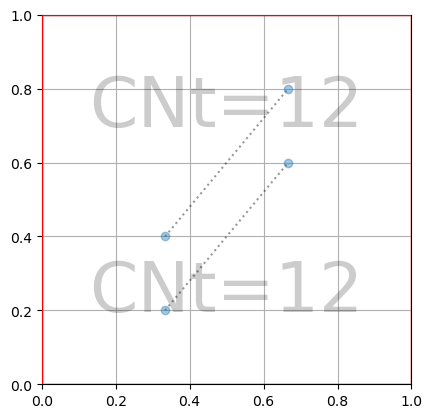

In [83]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.grid(True, zorder=2)
ax.add_artist(
    mpl.patches.Rectangle(
        (0, 0), 1, 1, 
        edgecolor='red',
        fill=False,
        # color='tab:blue', 
        zorder=5,
    )
)
ax.plot(
    [1/3, 2/3], 
    [[0.2, 0.4], 
     [0.6, 0.8]], 
    color='black', marker='o', markerfacecolor='tab:blue', markeredgecolor='tab:blue', linestyle=':',
    alpha=0.4,
)

ax.text(0.5, 0.25, f'CNt={12}', va='center', ha='center', alpha=0.2, size=50)
ax.text(0.5, 0.75, f'CNt={12}', va='center', ha='center', alpha=0.2, size=50)

# ax.plot([0.1, 0.2], [0.5, 0.3], color='black', marker='o', markerfacecolor='tab:blue', markeredgecolor='tab:blue', linestyle=':')
# ax.plot([0.4, 0.5], [0.8, 0.9], color='black', marker='o', markerfacecolor='tab:blue', markeredgecolor='tab:blue', linestyle=':')

# Sequence logo

In [13]:
# https://stackoverflow.com/questions/42615527/sequence-logos-in-matplotlib-aligning-xticks

import matplotlib
import matplotlib.patheffects
from matplotlib import transforms
import seaborn

COLOR_SCHEME = {'A': 'green', 'C': 'blue', 'G': 'gold', 'T': 'red'}

class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy

    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        affine = affine.identity().scale(self._sx, self._sy)+affine
        renderer.draw_path(gc, tpath, affine, rgbFace)


def draw_logo(all_scores):
    fig = plt.figure()
    fig.set_size_inches(len(all_scores),2.5)
    ax = fig.add_subplot(111)
    ax.set_xticks(range(len(all_scores)))

    xshift = 0
    trans_offset = transforms.offset_copy(ax.transAxes, 
                                  fig=fig, 
                                  x=0, 
                                  y=0, 
                                  units='points')


    for scores in all_scores:
        yshift = 0
        for base, score in scores:
            txt = ax.text(0, 
                         0, 
                        base, 
                       transform=trans_offset,
                       fontsize=80, 
                       color=COLOR_SCHEME[base],
                       weight='bold',
                       ha='center',
                       family='sans-serif'
                       )
            txt.set_clip_on(False) 
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, fig=fig, y=yshift, units='points')
            xshift += window_ext.width
            trans_offset = transforms.offset_copy(ax.transAxes, fig=fig, x=xshift, units='points')

    ax.set_yticks(range(0,3))
    seaborn.despine(ax=ax, offset=30, trim=True)
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=90)
    ax.set_yticklabels(np.arange(0,3,1))
    plt.show()


ALL_SCORES1 = [[('C', 0.02247014831444764),
          ('T', 0.057903843733384308),
          ('A', 0.10370837683591219),
          ('G', 0.24803586793255664)],
         [('T', 0.046608227674354567),
          ('G', 0.048827667087419063),
          ('A', 0.084338697696451109),
          ('C', 0.92994511407402669)],
         [('G', 0.0),
          ('T', 0.011098351287382456),
          ('A', 0.022196702574764911),
          ('C', 1.8164301607015951)],
         [('C', 0.020803153636453006),
          ('T', 0.078011826136698756),
          ('G', 0.11268374886412044),
          ('A', 0.65529933954826969)],
         [('T', 0.017393530660176126),
          ('A', 0.030438678655308221),
          ('G', 0.22611589858228964),
          ('C', 0.45078233627623127)],
         [('G', 0.022364103549245576),
          ('A', 0.043412671595594352),
          ('T', 0.097349627214363091),
          ('C', 0.1657574733649966)],
         [('C', 0.03264675899941203),
          ('T', 0.045203204768416654),
          ('G', 0.082872542075430544),
          ('A', 1.0949220710572034)],
         [('C', 0.0),
          ('T', 0.0076232429756614498),
          ('A', 0.011434864463492175),
          ('G', 1.8867526364762088)],
         [('C', 0.0018955903000026028),
          ('T', 0.0094779515000130137),
          ('A', 0.35637097640048931),
          ('G', 0.58005063180079641)],
         [('A', 0.01594690817903021),
          ('C', 0.017541598996933229),
          ('T', 0.2774762023151256),
          ('G', 0.48638069946042134)],
         [('A', 0.003770051401807444),
          ('C', 0.0075401028036148881),
          ('T', 0.011310154205422331),
          ('G', 1.8624053924928772)],
         [('C', 0.036479877757360731),
          ('A', 0.041691288865555121),
          ('T', 0.072959755514721461),
          ('G', 1.1517218549109602)],
         [('G', 0.011831087684038642),
          ('T', 0.068620308567424126),
          ('A', 0.10174735408273231),
          ('C', 1.0009100180696691)],
         [('C', 0.015871770937774379),
          ('T', 0.018757547471915176),
          ('A', 0.32176408355669878),
          ('G', 0.36505073156881074)],
         [('A', 0.022798100897300954),
          ('T', 0.024064662058262118),
          ('G', 0.24571286522646588),
          ('C', 0.34070495229855319)]]

ALL_SCORES2 = [[('A', 0.01653482213365913),
          ('G', 0.026710097292833978),
          ('C', 0.035613463057111966),
          ('T', 0.057235922770358522)],
         [('C', 0.020055669245080433),
          ('G', 0.023816107228533015),
          ('A', 0.031336983195438178),
          ('T', 0.058913528407423782)],
         [('T', 0.018666958185377256),
          ('G', 0.084001311834197651),
          ('A', 0.093334790926886277),
          ('C', 0.30333807051238043)],
         [('C', 0.0),
          ('G', 0.0),
          ('A', 0.32027512306044359),
          ('T', 0.82203948252180525)],
         [('C', 0.012698627658037786),
          ('A', 0.053334236163758708),
          ('T', 0.096509570201087178),
          ('G', 0.10920819785912497)],
         [('C', 0.0),
          ('G', 0.089472611853783468),
          ('A', 0.1930724782107959),
          ('T', 0.22132698721725386)],
         [('C', 0.020962390607965918),
          ('A', 0.026202988259957396),
          ('G', 0.066380903591892068),
          ('T', 0.07336836712788071)],
         [('G', 0.0),
          ('A', 0.10236420974570831),
          ('C', 0.15354631461856247),
          ('T', 0.29173799777526871)],
         [('G', 0.027681850851852024),
          ('C', 0.089966015268519078),
          ('A', 0.089966015268519078),
          ('T', 0.53287562889815143)],
         [('A', 0.034165612000664765),
          ('C', 0.06833122400132953),
          ('G', 0.072601925501412631),
          ('T', 0.28186629900548432)],
         [('G', 0.0),
          ('A', 0.037325935579058833),
          ('C', 0.23328709736911771),
          ('T', 0.72785574379164719)],
         [('A', 0.017470244196759552),
          ('C', 0.062892879108334396),
          ('G', 0.094339318662501587),
          ('T', 0.19916078384305891)],
         [('G', 0.0),
          ('A', 0.096447131567581681),
          ('C', 0.15844885900388422),
          ('T', 0.48223565783790845)],
         [('G', 0.0),
          ('A', 0.069291952024925829),
          ('C', 0.20787585607477749),
          ('T', 0.46425607856700307)],
         [('G', 0.0),
          ('A', 0.0),
          ('C', 0.21713201856318373),
          ('T', 1.1495224512168551)],
         [('G', 0.0),
          ('A', 0.048934292002649343),
          ('T', 0.27263391258618919),
          ('C', 0.42642740173737281)],
         [('A', 0.0),
          ('G', 0.053607190685875404),
          ('C', 0.2054942309625224),
          ('T', 0.69689347891638032)],
         [('G', 0.0),
          ('A', 0.0),
          ('C', 0.31312908494534769),
          ('T', 0.84220926295645249)],
         [('G', 0.0),
          ('C', 0.068079835765814778),
          ('A', 0.068079835765814778),
          ('T', 1.3207488138568066)],
         [('G', 0.020257705570431345),
          ('A', 0.020257705570431345),
          ('C', 0.048618493369035232),
          ('T', 0.055371061892512348)],
         [('G', 0.0),
          ('A', 0.076286510680262556),
          ('C', 0.20538675952378382),
          ('T', 0.34622339462580698)]]

/tmp/ipykernel_24945/3020381818.py:15: MatplotlibDeprecationWarning: The identity function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use Affine2D() instead.
  affine = affine.identity().scale(self._sx, self._sy)+affine


NameError: name 'seaborn' is not defined

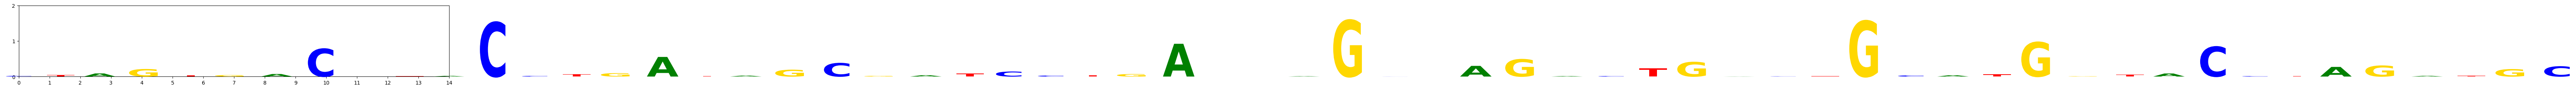

In [12]:
draw_logo(ALL_SCORES1)

# CNVkit

In [2]:
input_path = '/home/users/team_projects/Lung_Cancer_Panel_data/03_Data_from_YTKim/18_cnvkit/results/LU-14.panel.cnr'
df = pd.read_table(input_path, sep='\t', header=None)

# ComplexHeatmap

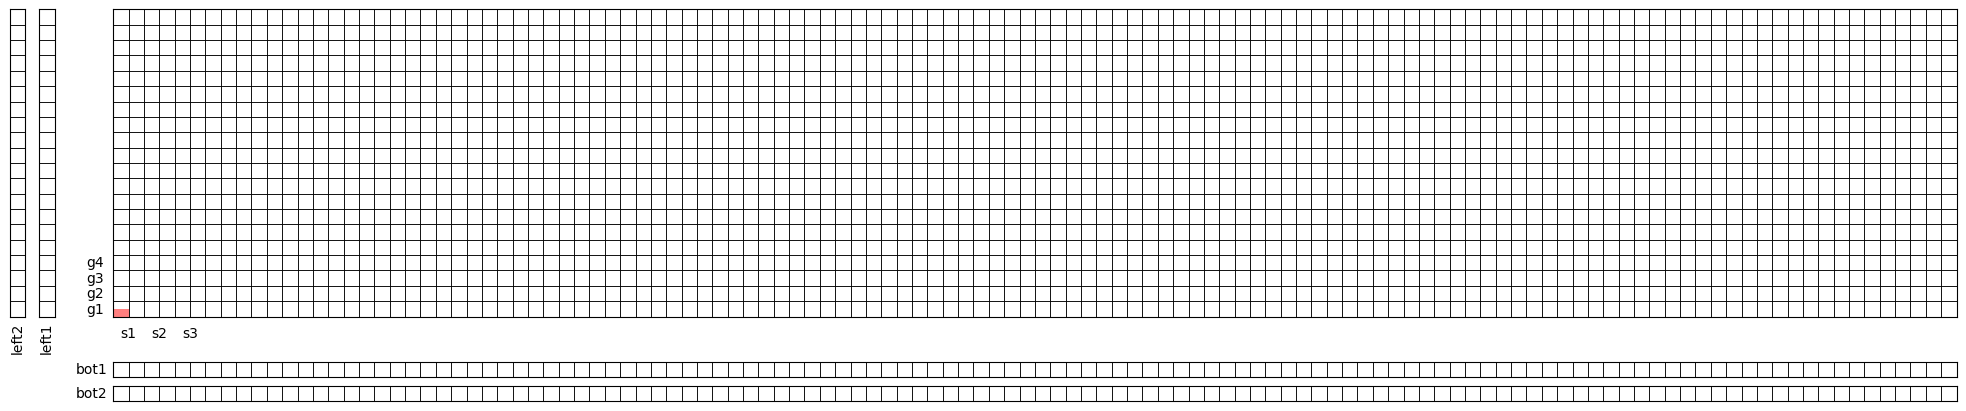

In [206]:
def make_quadmesh(len_x, len_y):
    xs = np.tile(np.arange(len_x + 1), (len_y + 1, 1))
    ys = np.tile(np.arange(len_y + 1), (len_x + 1, 1)).T
    coords = np.dstack((xs, ys))
    return mpl.collections.QuadMesh(coords, edgecolors='black', facecolors='none', linewidth=0.5)


def setup_main(ax, len_x, len_y):
    ax.set(xlim=(0, len_x), ylim=(0, len_y))
    ax.add_collection(make_quadmesh(len_x, len_y))

    recs = mpl.collections.PatchCollection(
        [
            mpl.patches.Rectangle((0, 0), 1, 0.5),
        ],
        facecolor='r', edgecolor=None, alpha=0.5, zorder=-1,
    )
    ax.add_collection(recs)

    ax.set_xticks(np.arange(1, num_x, 2), ['s1', 's2', 's3'])
    ax.tick_params(axis='x', bottom=False)

    # ax.set_xticks(np.arange(0.5, num_x, 1), np.tile(['wgs', 'panel'], 3), minor=True)
    # ax.tick_params(axis='x', which='minor', bottom=False, rotation=90)

    ax.set_yticks(np.arange(0.5, num_y, 1), ['g1', 'g2', 'g3', 'g4'], va='center')
    ax.tick_params(axis='y', left=False)
    

def setup_bottom(ax, len_x, len_y, title):
    ax.set(xlim=(0, len_x), ylim=(0, 1))
    ax.add_collection(make_quadmesh(len_x, 1))
    ax.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)
    ax.set_ylabel(title, rotation=0, va='center', ha='right')

    
def setup_left(ax, len_x, len_y, title):
    ax.set(xlim=(0, 1), ylim=(0, len_y))
    ax.add_collection(make_quadmesh(1, len_y))
    ax.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)
    ax.set_xlabel(title, rotation=90, va='top', ha='center')

    
len_x = 120
len_y = 20

fig = plt.figure(
    figsize=(20, 4), 
    layout='constrained',
)

axd = fig.subplot_mosaic(
    [['lleft', 'left', 'main'],
     ['.', '.', 'bottom'],
     ['.', '.', 'bbottom']],
    width_ratios=(1, 1, len_x),
    height_ratios=(len_y, 1, 1),
)
for ax in axd.values():
    ax.set_aspect(1)

setup_main(axd['main'], len_x, len_y)
setup_bottom(axd['bottom'], len_x, len_y, 'bot1')
setup_bottom(axd['bbottom'], len_x, len_y, 'bot2')
setup_left(axd['left'], len_x, len_y, 'left1')
setup_left(axd['lleft'], len_x, len_y, 'left2')

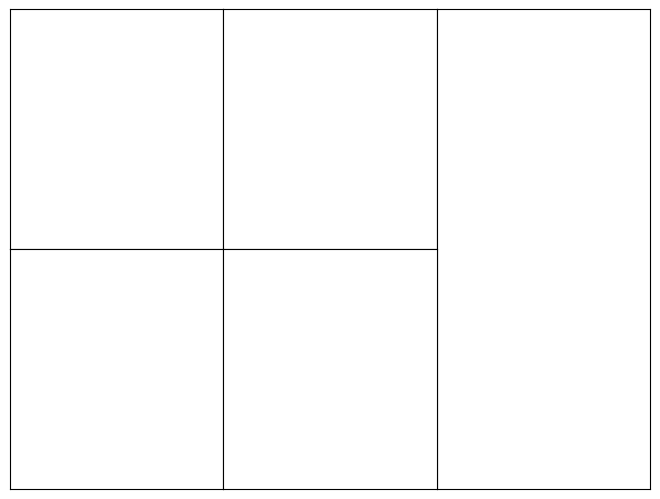

In [243]:
fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
# fig.tight_layout()
axd = fig.subplot_mosaic([['a', 'b', 'c'],
                          ['d', 'e', 'c']], 
                         # gridspec_kw={'wspace':0, 'hspace':0},
                        )

for key in ('a', 'b', 'd', 'e', 'c'):
    axd[key].tick_params(labelbottom=False, bottom=False, labelleft=False, left=False)

# subfigs = fig.subfigures(1, 2, width_ratios=[3, 1])

# axs = subfigs[0].subplots(2, 2)
# for ax in axs.flat:
#     ax.tick_params(labelbottom=False, bottom=False, labelleft=False, left=False)

# ax = subfigs[1].add_axes((0, 0, 1, 1))

# Subfigures

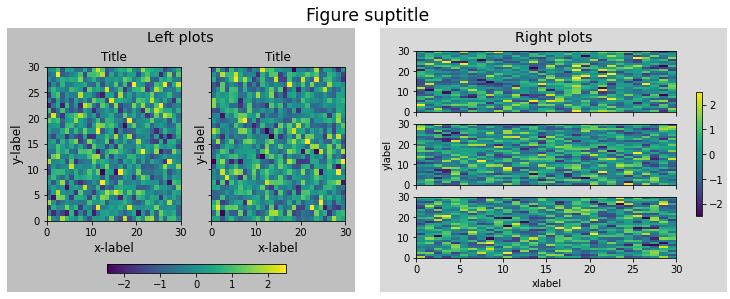

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc

np.random.seed(19680808)
# gridspec inside gridspec
fig = plt.figure(constrained_layout=True, figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axsLeft = subfigs[0].subplots(1, 2, sharey=True)
subfigs[0].set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfigs[0].suptitle('Left plots', fontsize='x-large')
subfigs[0].colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    pc = example_plot(ax, hide_labels=True)
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].colorbar(pc, shrink=0.6, ax=axsRight)
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()

# Polar Fill

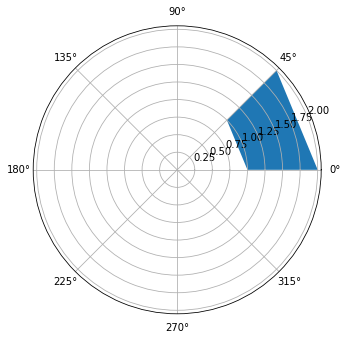

In [15]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], aspect='equal', polar=True)
ax.fill(np.deg2rad([0, 45, 45, 0]), [1, 1, 2, 2])
plt.show()

# Polar bar

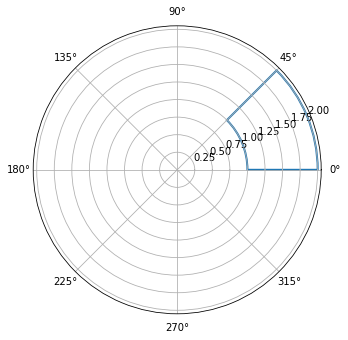

In [20]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], aspect='equal', polar=True)
ax.bar(
    x=0, height=1, width=np.deg2rad(45), bottom=1, align='edge', fill=False, lw=2,
    edgecolor='tab:blue',
)
plt.show()

# Arc

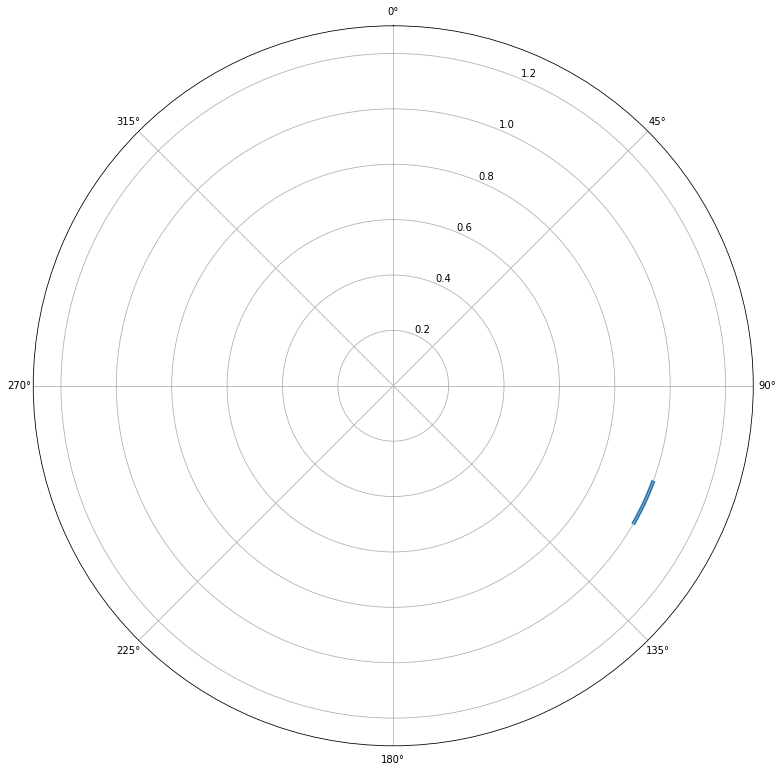

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1], polar=True, aspect='equal')

ax.set_theta_offset(np.deg2rad(90))
ax.set_theta_direction(-1)
# ax.set_xlim(0, np.deg2rad(180))
# ax.set_ylim(0, 1)
ax.spines['polar'].set_visible(True)

ax.set_ylim(0, 1.3)

# t = np.deg2rad(np.linspace(0, 180, 20))
# r = np.full(t.shape, 1)
# ax.plot(
#     t, r, 
#     color='tab:blue',
#     linewidth=4,
# )

arc = mpl.patches.Arc(
    (0, 0), 
    2, 2,
    theta1=-30,
    theta2=-20,
    linewidth=4,
    edgecolor='tab:blue',
    transform=ax.transData._b,
)
ax.add_patch(arc)

In [ ]:
class Mycls:
    @staticmethod
    def foo(var):
        print(var)
        
mycls = Mycls()
mycls.foo('hihi')

hihi


In [32]:
arr1 = np.array([True, False, False])
arr2 = np.array([True, True, False])
arr1 & arr2

array([ True, False, False])

In [ ]:
ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='green', edgecolor='green', zorder=1)
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)
fig.savefig('ellipse_compare')

# Path

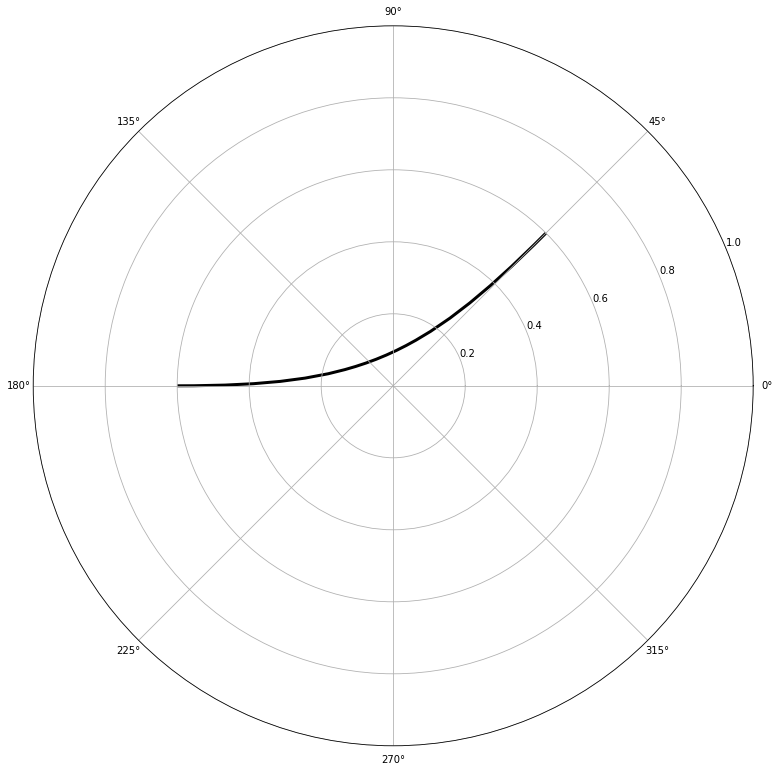

In [167]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

start = (45, 0.6)
end = (180, 0.6)
p1 = (start[0], 0.1)
p2 = (end[0], 0.1)

verts = [
    start,
    p1,
    p2,
    end,
]
verts = [[np.deg2rad(x[0]), x[1]] for x in verts]

codes = [
    mpath.Path.MOVETO,
    mpath.Path.CURVE4,
    mpath.Path.CURVE4,
    mpath.Path.CURVE4,
]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1], polar=True)
ax.set_ylim(0, 1)

patch = mpatches.PathPatch(
    mpath.Path(verts, codes),
    fill=False,
    lw=3,
    # facecolor='orange',
    # lw=2,
)
ax.add_patch(patch)
# ax.plot(x, y, 'x')
# ax.set_xlim(-2, 2)
# ax.set_ylim(-2, 2)

plt.show()

# Polar plot label

Text(0.7853981633974483, 1.05, 'LABEL')

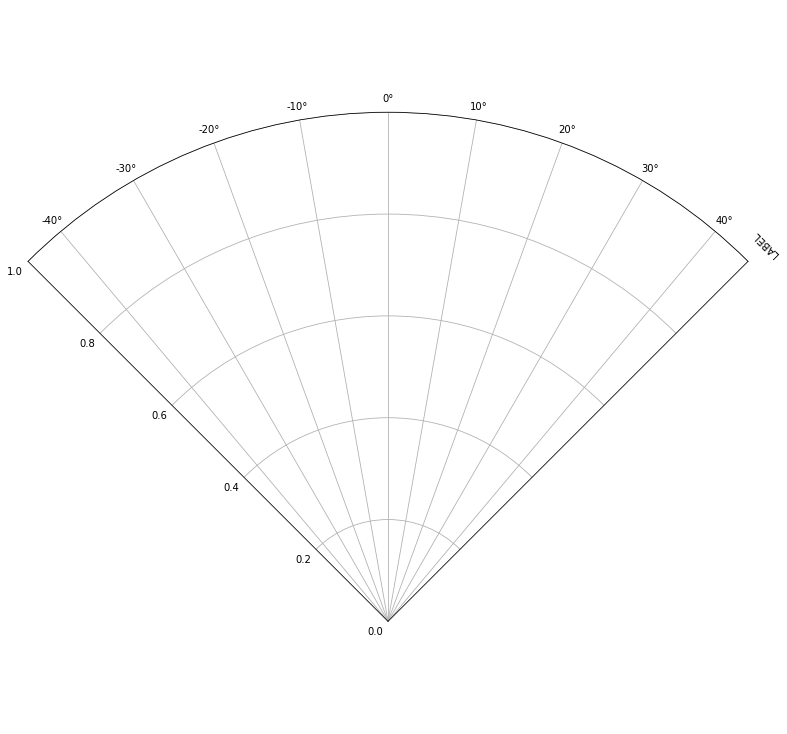

In [41]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes([0, 0, 1, 1], polar=True)
ax.set_theta_offset(np.deg2rad(90))
ax.set_theta_direction(-1)
ax.set_xlim(*np.deg2rad((-45, 45)))
ax.set_ylim(0, 1)
ax.spines['polar'].set_visible(True)

# ax.xaxis.set_ticks([])
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticks([])
# ax.yaxis.set_ticklabels([])

ax.text(np.deg2rad(45), 1.05, 'LABEL', rotation=(-45 + 180), ha='center', va='center')

In [230]:
fig = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

In [231]:
ax = fig.add_axes([0, 0, 1, 1], polar=True)
ax.set_theta_offset(np.deg2rad(90))
# ax.set_theta_zero_location(
#     'N', 
#     offset=45,
# )
ax.set_theta_direction(-1)
ax.set_xlim(0, np.deg2rad(180))
ax.set_ylim(0, 1000)
ax.spines['polar'].set_visible(True)

# ax.xaxis.set_ticks([])
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticks([])
# ax.yaxis.set_ticklabels([])

In [232]:
angles = (0, np.pi / 4)
theta = np.linspace(angles[0], angles[1], 10)
r = np.full(theta.shape, 400)

ax.plot(theta, r)

In [233]:
ax.bar(
    x=[np.pi/4], 
    width=[np.pi/16], 
    bottom=[500],
    height=[100],
    facecolor='#30303000',
    edgecolor='#303030',
    linewidth=0.75,
    align='edge',
)

<BarContainer object of 1 artists>

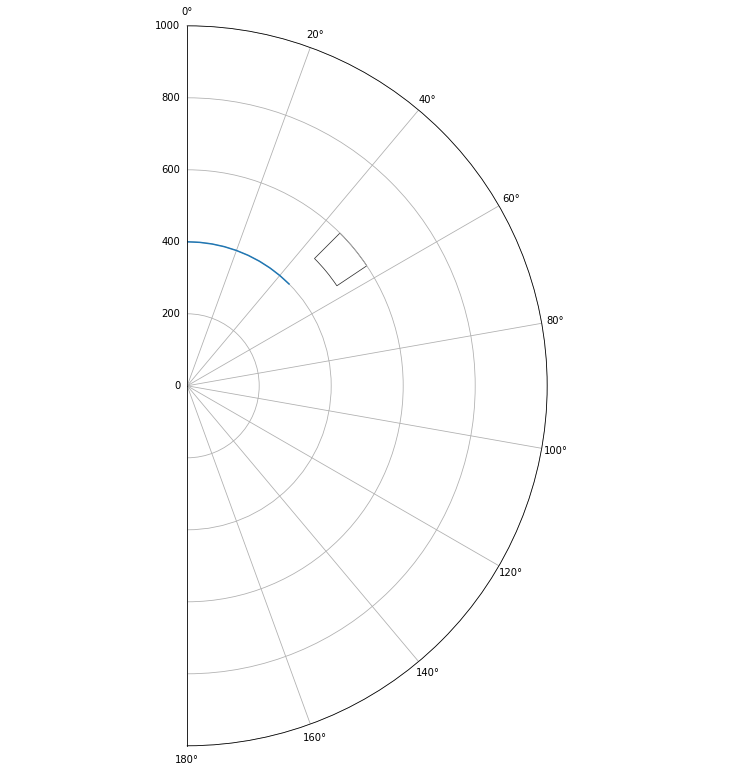

In [234]:
fig

In [3]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

Text(0.5, 0.98, 'plt.subplot_mosaic()')

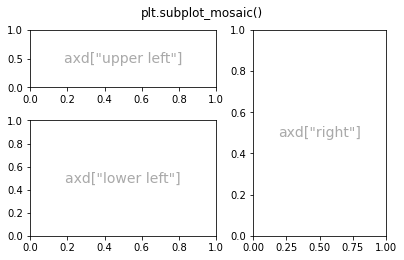

In [6]:
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

Text(0.02, 0.5, 'ylabel for subfigs[1]')

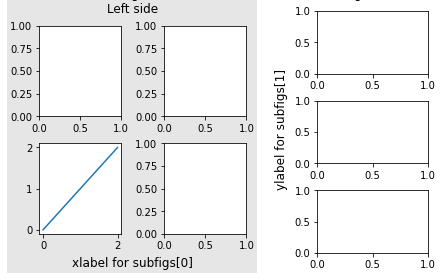

In [17]:
fig = plt.figure(constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
axs0[1, 0].plot([0, 1, 2])
subfigs[0].set_facecolor('0.9')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

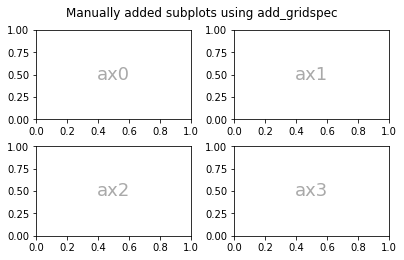

In [18]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

fig.suptitle('Manually added subplots using add_gridspec')

Text(0.5, 0.98, 'Manual gridspec with right=0.75')

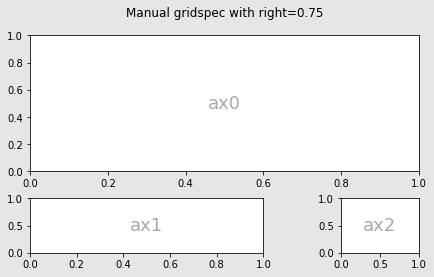

In [30]:
fig = plt.figure(constrained_layout=False, facecolor='0.9')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.95,
                      hspace=0.5, wspace=1)
ax0 = fig.add_subplot(gs[:-1, :])
annotate_axes(ax0, 'ax0')
ax1 = fig.add_subplot(gs[-1, :-1])
annotate_axes(ax1, 'ax1')
ax2 = fig.add_subplot(gs[-1, -1])
annotate_axes(ax2, 'ax2')
fig.suptitle('Manual gridspec with right=0.75')

Text(0.5, 0.98, 'nested gridspecs')

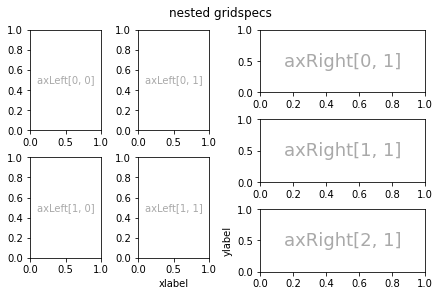

In [33]:
fig = plt.figure(constrained_layout=True)
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)

for a in range(2):
    for b in range(2):
        ax = fig.add_subplot(gs00[a, b])
        annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
        if a == 1 and b == 1:
            ax.set_xlabel('xlabel')
for a in range(3):
    ax = fig.add_subplot(gs01[a])
    annotate_axes(ax, f'axRight[{a}, {b}]')
    if a == 2:
        ax.set_ylabel('ylabel')

fig.suptitle('nested gridspecs')

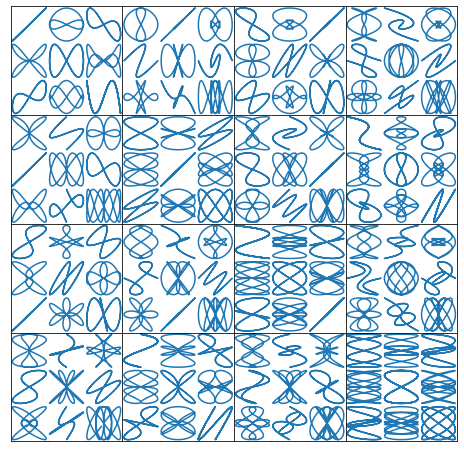

In [41]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8), constrained_layout=False)
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())

plt.show()